# Precision Manufacturing: Harnessing Machine Learning for Pass-Fail Yield Prediction

## Project Description
Precision Manufacturing: Harnessing Machine Learning for Pass-Fail Yield Prediction



**Project Overview**

🔬👨‍🔬 A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/variables collected from sensors and or process measurement points. 📊

However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. 📉📝❌

Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. 🛠️📈

The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning, and reduce per-unit production costs. 💹⏳💲

These signals can be used as features to predict the yield type. And by analyzing and trying out different combinations of features, essential signals that are impacting the yield type can be identified. 📊🔄💡

**Data preprocessing:**
- ✨ Handle missing values

- 📊 Encoding the Output Data

- 🧐 Checking if the dataset contains any NULL values

- 📊🧐 Taking care of outliers

- 📏 Feature Scaling

**Data Visualization:**

- 📝🔍 Reviewing the data for some general information


**Model Training:**

- 🧩 Split data into training and testing sets

- 🚀 Train selected models on training data

**ML Models:**

- 📊 Logistic regression

- 🧠 ANN

**Model Evaluation:**

- 📊 Evaluate model performance using accuracy metrics

- 📉 Analyze confusion matrix

- 📈 Plotting the ANN Learning Curve

**Tuning:**

- ⚙️ Hyperparameter tuning for model optimization


Dataset: SemiconductorManufacturingProcessDataset.csv
 

## Importing the Libraries

In [102]:
#For basic operations
import numpy as np
import pandas as pd


#For visulauzations
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import plotly.express as px


#Tensorflow
import tensorflow as tf


## Importing the Dataset

In [103]:
dataset = pd.read_csv('SemiconductorManufacturingProcessDataset.csv')

## Showing the Dataset in a Table

In [104]:
pd.DataFrame(dataset)
#dataset

,Time,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,...,Sensor 429,Sensor 430,Sensor 431,Sensor 432,Sensor 433,Sensor 434,Sensor 435,Sensor 436,Sensor 437,Pass/Fail
0,7/19/2008 11:55,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,Pass
1,7/19/2008 12:32,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,Pass
2,7/19/2008 13:17,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,Fail
3,7/19/2008 14:43,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,Pass
4,7/19/2008 15:22,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,10/16/2008 15:13,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,Pass
1563,10/16/2008 20:49,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,Pass
1564,10/17/2008 5:26,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,NaN,NaN,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,Pass
1565,10/17/2008 6:01,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,Pass


## A Quick Review of the Data

In [105]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 439 entries, Time to Pass/Fail
dtypes: float64(437), object(2)
memory usage: 5.2+ MB


## Visualization

Dataset shape:
(1567, 439)
unique values:
['Pass' 'Fail']
printing size .....
Pass    1463
Fail     104
Name: Pass/Fail, dtype: int64
1463
104


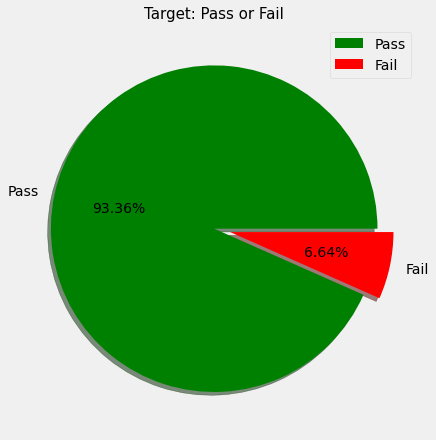

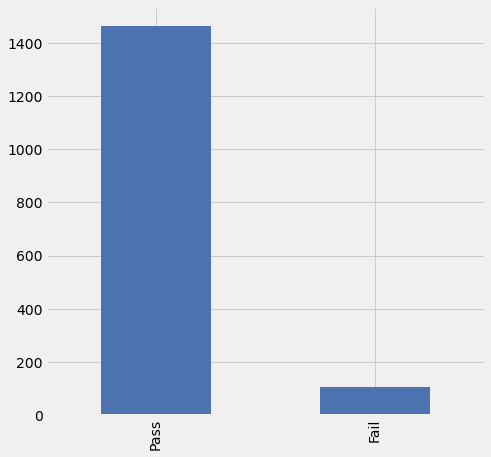

In [106]:
print("Dataset shape:")
print (dataset.shape)
unique_vals = dataset['Pass/Fail'].unique()
print("unique values:")
print (unique_vals)

#print ("Only selecting rows with a Pass decision")
#print (dataset.loc[ dataset["Pass/Fail"]=="Pass", : ])
#print (dataset.loc[ dataset["Pass/Fail"]=="Pass"]) # same as above line

targets =  [dataset.loc[ dataset['Pass/Fail'] == val ]  for val in unique_vals]  
#print (targets)
#rint (targets[0]) # All passes
#print (targets[1]) # All failes


##### Pie chart##########
labels = ['Pass', 'Fail']
colors = ['Green', 'Red']
size = dataset['Pass/Fail'].value_counts() # returns a python series (i.e. one dimensional labelled array) 
print ("printing size .....")
print (size)
print (size["Pass"])
print (size["Fail"])
explode = [0, 0.1 ]
plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%" ,shadow = True)
#plt.axis('off')
plt.title('Target: Pass or Fail', fontsize = 15)
plt.legend()
plt.show()
# series.plot(x='', y='', kind=“scatter”)
size.plot(kind="bar");

## Seperate The Input and Output
Here, we put the independent variables in X and the dependent variable in y. 

In [107]:
X = dataset.iloc[:, 1:438].values
y = dataset.iloc[:, -1].values

## Showing the Input Data in a Table format

In [108]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,427,428,429,430,431,432,433,434,435,436
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,-0.0057,...,1.4879,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,-0.0093,...,1.0187,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,NaN,NaN,NaN,...,1.2237,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,0.0032,...,1.7085,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


## A Quick Check of the Output Data

In [109]:
pd.DataFrame(y)

,0
0,Pass
1,Pass
2,Fail
3,Pass
4,Pass
...,...
1562,Pass
1563,Pass
1564,Pass
1565,Pass


## Taking care of missing data

In [110]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

In [111]:
# A quick check
print(X)

[[3.03093000e+03 2.56400000e+03 2.18773330e+03 ... 1.64749042e-02
  5.28333333e-03 9.96700663e+01]
 [3.09578000e+03 2.46514000e+03 2.23042220e+03 ... 2.01000000e-02
  6.00000000e-03 2.08204500e+02]
 [2.93261000e+03 2.55994000e+03 2.18641110e+03 ... 4.84000000e-02
  1.48000000e-02 8.28602000e+01]
 ...
 [2.97881000e+03 2.37978000e+03 2.20630000e+03 ... 8.60000000e-03
  2.50000000e-03 4.35231000e+01]
 [2.89492000e+03 2.53201000e+03 2.17703330e+03 ... 2.45000000e-02
  7.50000000e-03 9.34941000e+01]
 [2.94492000e+03 2.45076000e+03 2.19544440e+03 ... 1.62000000e-02
  4.50000000e-03 1.37784400e+02]]


In [112]:
# Checking if X contains any NULL values
pd.DataFrame(X).isnull().any().any()

False

## Encoding Categorical Data

### Encoding the Independent Variable

In [113]:
# we don't have any categorical data

### Encoding the Dependent Variable

In [114]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [115]:
# a qucik check
print(y)

[1 1 0 ... 1 1 1]


Summary of the output variable encoding :

Pass: 1

Fail :0

## Taking care of outliers in X & y

In [116]:
# Source 1: https://towardsdatascience.com/local-outlier-factor-lof-algorithm-for-outlier-identification-8efb887d9843
# Source 2: https://towardsdatascience.com/anomaly-detection-with-local-outlier-factor-lof-d91e41df10f2
#Local Outlier Factor (LOF) — Algorithm for outlier identification

from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(contamination=0.01)

# yhat has postive and negative values(i.e +1 & -1).Negative values are outliers 
# and positives inliers

yhat = lof.fit_predict(X)


# filter outlier values
mask = (yhat != -1)

print("mask shape: ",mask.shape)

X, y = X[mask, :], y[mask]
print("X shape",X.shape)
print("y shape",y.shape)

pd.DataFrame(X)

mask shape:  (1567,)
X shape (1551, 437)
y shape (1551,)


,0,1,2,3,4,5,6,7,8,9,...,427,428,429,430,431,432,433,434,435,436
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.500500,0.016200,-0.003400,...,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.496600,-0.000500,-0.014800,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.443600,0.004100,0.001300,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.488200,-0.012400,-0.003300,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.503100,-0.003100,-0.007200,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.342400,-0.004500,-0.005700,...,1.4879,11.7256,0.4988,0.0143,0.0039,2.8669,0.006800,0.013800,0.004700,203.172000
1547,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.433300,-0.006100,-0.009300,...,1.0187,17.8379,0.4975,0.0131,0.0036,2.6238,0.006800,0.013800,0.004700,203.172000
1548,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,1.462862,-0.000841,0.000146,...,1.2237,17.7267,0.4987,0.0153,0.0041,3.0590,0.019700,0.008600,0.002500,43.523100
1549,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.462200,-0.007200,0.003200,...,1.7085,19.2104,0.5004,0.0178,0.0038,3.5662,0.026200,0.024500,0.007500,93.494100


## Splitting the Dataset into the Training set and Test set

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [118]:
# Scaling the X_train using fit_transform () and scaling X_train using the transform () 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [119]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,427,428,429,430,431,432,433,434,435,436
0,-2.072180,0.475795,0.805546,0.269758,0.397772,-0.222463,-0.258889,-1.187515,0.035521,0.259533,...,-0.206552,-0.462763,0.741028,0.341120,0.209042,0.317386,0.628919,0.809275,0.627246,-0.201607
1,-3.047690,0.475919,-0.647662,-0.538189,-0.686511,-0.367036,0.028874,1.110874,-0.942923,-0.264703,...,-0.208999,-0.224070,1.072751,0.233177,0.242327,0.210641,0.955127,0.505658,0.245556,-0.389124
2,-0.747138,0.229741,0.984539,0.369367,0.300398,0.254969,0.191523,0.065422,-0.079989,1.067731,...,-0.246899,-0.489487,-1.581035,-0.328122,-0.157099,-0.309888,-0.602515,-0.596358,-0.517823,-0.210724
3,-1.479892,0.261176,0.298769,-1.055695,1.167585,2.937396,0.028874,2.092074,-0.793438,-1.793725,...,-0.223270,0.094469,-1.038215,-0.184199,-0.190384,-0.171500,0.131453,0.505658,0.002663,-0.097077
4,1.437808,0.571949,1.112821,0.096782,0.313368,0.235726,0.191523,0.298339,-1.194328,-0.756174,...,-0.223480,-0.513534,0.379148,-0.392888,-0.390097,-0.382572,-0.488342,-0.585113,-0.448425,-0.281496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,-0.156888,-0.782706,-2.134059,-0.507795,-1.159014,0.883449,0.316638,0.637007,0.558717,-0.242860,...,-0.189887,-0.452690,-0.917589,-0.227376,-0.123813,-0.214923,-0.015341,-0.630093,-0.587221,-0.510591
1236,0.010882,0.610040,1.563288,1.315059,-0.389600,-0.727587,-0.133775,0.440232,1.000376,0.543495,...,-0.218531,0.538174,0.137895,-0.033080,-0.023957,-0.036047,0.522902,-0.337721,-0.379026,-0.542377
1237,0.555081,-0.465153,-0.889676,-0.569491,-0.841152,0.461414,0.341660,0.263536,0.388848,1.581046,...,-0.261026,-0.269581,-2.244482,-0.105042,0.075900,-0.091009,-0.912412,-0.360212,0.002663,0.303563
1238,-0.497725,0.287063,-1.198069,-0.833035,0.001691,0.150128,0.279103,0.359915,0.103469,0.598103,...,-0.174225,1.983292,1.253691,-0.061865,-0.057242,-0.067138,0.433195,-0.348967,-0.170832,-0.526085


## Learning models

###  Logistic Regression Model  

#### Training the Logistic Regression model on the train dataset

In [120]:
from sklearn.linear_model import LogisticRegression
LogitReg = LogisticRegression(solver='lbfgs', max_iter=1000)
LogitReg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### Calculating the Probability Estimates

In [121]:
'''
predict_proba()
The returned estimates for all classes are ordered by the label of classes.

Label 0 : Fail
Label 1: Pass
'''


Probability=LogitReg.predict_proba(X_test)
print("Shape: ",Probability.shape)
print(" Probability estimates: ",Probability)
#print("Chance of Failure is ", 100*Probability[0,1], "%" )

Shape:  (311, 2)
 Probability estimates:  [[2.27948187e-01 7.72051813e-01]
 [5.36218054e-02 9.46378195e-01]
 [1.49094034e-02 9.85090597e-01]
 [0.00000000e+00 1.00000000e+00]
 [9.31272065e-07 9.99999069e-01]
 [2.68452287e-03 9.97315477e-01]
 [1.31412914e-05 9.99986859e-01]
 [1.97477935e-04 9.99802522e-01]
 [2.01263268e-07 9.99999799e-01]
 [1.19340428e-01 8.80659572e-01]
 [4.65147953e-01 5.34852047e-01]
 [4.46745287e-08 9.99999955e-01]
 [1.08564635e-05 9.99989144e-01]
 [4.93707693e-02 9.50629231e-01]
 [1.65287342e-06 9.99998347e-01]
 [1.23196211e-06 9.99998768e-01]
 [2.02875124e-04 9.99797125e-01]
 [8.38294324e-07 9.99999162e-01]
 [2.00474232e-02 9.79952577e-01]
 [4.75219448e-03 9.95247806e-01]
 [7.43249692e-02 9.25675031e-01]
 [1.06208569e-02 9.89379143e-01]
 [1.22417253e-07 9.99999878e-01]
 [1.39140595e-04 9.99860859e-01]
 [1.16477467e-06 9.99998835e-01]
 [7.36224795e-04 9.99263775e-01]
 [5.37477619e-05 9.99946252e-01]
 [9.93564993e-01 6.43500659e-03]
 [6.14416037e-02 9.38558396e-01]
 

#### Predicting the Test set Results

In [122]:
y_pred=LogitReg.predict(X_test)

In [123]:
compare=[y_pred,y_test]
pd.DataFrame(compare)

,0,1,2,3,4,5,6,7,8,9,...,301,302,303,304,305,306,307,308,309,310
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1


In [124]:
print(y_pred.shape)
print(y_test.shape)

(311,)
(311,)


In [125]:
accuracy = np.sum(y_pred==y_test)/len(y_test)
print(accuracy)

0.8906752411575563


#### Calculate the performance using Confusion Matrix

In [126]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Logistic regression model accuracy is=", accuracy_score(y_test, y_pred)*100, "%")

[[  4  14]
 [ 20 273]]
Logistic regression model accuracy is= 89.06752411575563 %


### ANN Model

-Sequential Model API:

        It is referred to as “sequential” because it involves defining a Sequential class and
        adding layers to 
        the model one by one in a linear manner, from input to output.
        
        The sequential API is easy to use because you keep calling model.add() until you have
        added all of your
        layers.

- Here, We are building a multilayer perceptron model(MLP), which is a standard fully connected neural network model.

        It is comprised of layers of nodes where each node is connected to all outputs from the
        previous layer 
        and the output of each node is connected to all inputs for nodes in the next layer.
        
        Multilayer Perceptron Model is appropriate for tabular data.
        
        There are three predictive modeling problems you may want to explore with an MLP; they
        are binary classification, multiclass classification, and regression.
  
-It is a good practice to use ‘relu‘ activation with a ‘he_normal‘ weight initialization. This combination goes a long way to overcome the problem of vanishing gradients when training deep neural network models. 
        
        (activation='relu', kernel_initializer='he_normal')
        
-For multiclass classification problems, the model must have one node for each class in the output layer and use the softmax activation function. The loss function is the ‘sparse_categorical_crossentropy‘, which is appropriate for integer encoded class labels (e.g. 0 for one class, 1 for the next class, etc.)


-For regression problem involving predicting a single numerical value, the output layer must have a single node and uses the default or linear activation function (no activation function). The 'mean squared error' loss is minimized when fitting the model. 

Also , we cannot calculate  accuracy for regression problems. We only calculate accuracy for classification problems.

 

#### Initializing the ANN

In [210]:
model= tf.keras.models.Sequential()

#### Adding the Input Layer

In [211]:
# Desne: full connection

model.add(tf.keras.layers.Dense(units=437,input_dim=437, activation='relu',kernel_initializer='he_normal'))

#### Adding the Hidden Layer

In [212]:
model.add(tf.keras.layers.Dense(units=218, activation='relu',kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(units=109, activation='relu',kernel_initializer='he_normal'))


#### Adding the Output Layer

In [213]:
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#### Compiling the ANN

-Compiling the model requires that you first select a loss function that you want to optimize, such as mean squared error or cross-entropy or parse_categorical_crossentropy

‘binary_crossentropy‘ for binary classification.
‘sparse_categorical_crossentropy‘ for multi-class classification.
‘mean squared error' for regression.
-It also requires that you select an algorithm to perform the optimization procedure, typically stochastic gradient descent, or a modern variation, such as Adam.

The optimizer can be specified as a string for a known optimizer class, e.g. ‘sgd‘ for stochastic gradient descent, or you can configure an instance of an optimizer class and use that.

opt = SGD(learning_rate=0.01, momentum=0.9)

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [214]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.051)

model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

#### Training the ANN

-Fitting the model requires that you first select the training configuration, such as the number of epochs (loops through the training dataset) and the batch size (number of samples/rows in an epoch used to
estimate model error).

-Training applies the chosen optimization algorithm to minimize the chosen loss function and updates
the model using the backpropagation of error algorithm.

-Fitting the model is the slow part of the whole process and can take seconds to hours to days, depending on the complexity of the model, the hardware you’re using, and the size of the training dataset.

-Generally speaking , training is stopped when the error made by the model falls to a low level or no longer improves, or a maximum number of epochs is performed. In this example, the training is stooped afte 100 epoch.

-If the learning rate is too large, the algorithm will overshoot/skip the global cost minimum while if the learning rate is too small, the algorithm requires more epochs until convergence, which can make the learning slow, especially for large datasets.

-While fitting the model, a progress bar will summarize the status of each epoch and the overall training process. This can be simplified to a simple report of model performance each epoch by setting the “verbose” argument to 2. All output can be turned off during training by setting “verbose” to 0.

In [215]:
#In our call to the fit function, we included reference to a validation dataset. 
#This validation dataset is a portion of the training set not used to fit the model, and is instead used
# to evaluate the performance of the model during training (i.e. during each epoch)
history = \
model.fit(X_train, y_train, \
             validation_split=0.2, batch_size=20, \
             epochs=100)

Epoch 1/100
50/50 [==============================] - 1s 4ms/step - loss: 2.9111 - accuracy: 0.8790 - val_loss: 0.3363 - val_accuracy: 0.9274
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2791 - accuracy: 0.9284 - val_loss: 0.2631 - val_accuracy: 0.9274
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2754 - accuracy: 0.9315 - val_loss: 0.2604 - val_accuracy: 0.9274
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2478 - accuracy: 0.9325 - val_loss: 0.2605 - val_accuracy: 0.9274
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2481 - accuracy: 0.9325 - val_loss: 0.2603 - val_accuracy: 0.9274
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2474 - accuracy: 0.9325 - val_loss: 0.2603 - val_accuracy: 0.9274
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2476 - accuracy: 0.9325 - val_loss: 0.2602 - val_accuracy: 0.9274
Epoch 8/100
5

Epoch 59/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2481 - accuracy: 0.9325 - val_loss: 0.2604 - val_accuracy: 0.9274
Epoch 60/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2478 - accuracy: 0.9325 - val_loss: 0.2604 - val_accuracy: 0.9274
Epoch 61/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2476 - accuracy: 0.9325 - val_loss: 0.2603 - val_accuracy: 0.9274
Epoch 62/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2478 - accuracy: 0.9325 - val_loss: 0.2604 - val_accuracy: 0.9274
Epoch 63/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2478 - accuracy: 0.9325 - val_loss: 0.2604 - val_accuracy: 0.9274
Epoch 64/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2484 - accuracy: 0.9325 - val_loss: 0.2603 - val_accuracy: 0.9274
Epoch 65/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2483 - accuracy: 0.9325 - val_loss: 0.2614 - val_accuracy: 0.9274
Epoch 

#### Visualize the model 

In [216]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 437)               191406    
_________________________________________________________________
dense_32 (Dense)             (None, 218)               95484     
_________________________________________________________________
dense_33 (Dense)             (None, 109)               23871     
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 110       
Total params: 310,871
Trainable params: 310,871
Non-trainable params: 0
_________________________________________________________________


#### Evaluating the Model

-From an API perspective, this involves calling a function with the holdout dataset and getting a loss and perhaps other metrics that can be reported.

    model.evaluate(X_test,y_test)
    
-From an API perspective, you simply call a function to make a prediction of a class label, probability, or numerical value: whatever you designed your model to predict.


-Learning curves are a plot of neural network model performance over time, such as calculated at the end of each training epoch.
Plots of learning curves provide insight into the learning dynamics of the model, such as whether the model is learning well, whether it is underfitting the training dataset, or whether it is overfitting the training dataset.


#####  Prediction on the Test Set

In [217]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,427,428,429,430,431,432,433,434,435,436
0,-0.236493,0.807648,0.749237,0.658846,0.295609,-0.244409,0.354172,0.006523,0.076290,0.510730,...,-0.226606,-0.177645,-1.309625,0.118039,0.242327,0.119130,0.995903,-0.135310,-0.379026,-0.574642
1,-0.891407,0.478261,1.653159,1.548348,1.516175,-0.875219,0.028874,-1.622563,-0.691517,0.161239,...,-0.212161,-0.130632,1.856825,-0.234572,-0.157099,-0.239381,0.433195,0.100836,-0.101434,-0.369428
2,0.361772,-0.127876,-0.282960,0.128753,-0.884052,0.525423,0.516821,0.695906,-0.705106,-0.821704,...,-0.218489,-0.497121,-0.223985,-0.112238,0.009329,-0.105173,0.531057,1.911292,2.154004,0.199102
3,0.030172,-2.636249,-0.092781,0.097122,-0.773708,0.593752,0.078920,-0.230411,0.110263,-0.319311,...,-0.257295,-0.015762,-0.465239,-0.040276,-0.023957,-0.036462,-1.703465,-0.562623,-0.552522,-1.045092
4,-0.993020,-0.398215,2.021213,0.482073,-0.302802,-0.656733,-0.296423,0.524564,-0.161526,1.286163,...,-0.217901,-0.486937,-0.977902,0.168412,0.009329,0.165559,-0.162134,0.516903,0.696644,0.080709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0.955419,0.648872,0.520647,1.489040,-0.292825,-0.288996,0.229057,0.517871,1.244987,1.209712,...,4.889454,6.385862,0.348991,-0.155415,-0.123813,-0.155091,-0.113203,0.449433,0.280255,0.017997
307,0.293714,0.328976,2.475413,0.361360,0.097270,0.621816,-0.609210,-1.290588,-0.976896,0.510730,...,-0.229299,-0.070735,-0.977902,-0.169807,-0.290240,-0.160514,0.531057,-0.472662,-0.274929,-0.587031
308,0.262197,-1.017173,1.471928,1.880157,1.557280,-1.895193,-0.046194,-0.799319,1.645877,-0.384840,...,-0.202623,-0.153217,0.107738,-0.277749,-0.256955,-0.264876,1.142696,0.179552,0.210857,-0.515544
309,1.624189,0.120890,-0.722615,-0.921071,-1.190940,0.553842,-0.058706,-0.530259,-1.146765,-0.723410,...,-0.213666,0.083856,-1.068372,-0.018688,0.175756,-0.010346,0.506591,-0.056595,0.002663,-0.445937


In [218]:
y_pred = model.predict(X_test)
Pass = (y_pred > 0.5)
# Just for quick test: 
print('This part passes?', Pass[1])
print('This part passes?', Pass[27])

This part passes? [ True]
This part passes? [ True]


#### Checking the Confusion Matrix and Accuracy Score

In [219]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = (y_pred > 0.5) #Classification metrics can't handle a mix of binary and continuous targets, so we change the target (y_pred) to binary, True/False
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  0  18]
 [  0 293]]


0.9421221864951769

In [220]:
# Another quick way to check the loss and accuracy
model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.2212 - accuracy: 0.9421


[0.22121524810791016, 0.9421221613883972]

#### Plotting the Learning Curve

-Learning curves are a plot of neural network model performance over time, such as calculated at the end of each training epoch. So,  A learning curve is a plot of the loss on the training dataset and the validation dataset over the period of epochs.

Plots of learning curves provide insight into the learning dynamics of the model, such as whether the model is learning well, whether it is underfitting the training dataset, or whether it is overfitting the training dataset.


- Steps to create learning curves for your deep learning models.

(1) you must update your call to the fit function to include reference to a validation dataset. This is a portion of the training set not used to fit the model, and is instead used to evaluate the performance of the model during training (i.e. during each epoch)

(2) You can split the data manually and specify the validation_data argument, or you can use the validation_split argument and specify a percentage split of the training dataset and let the API perform the split for you. The latter is simpler for now.

(3) The fit function will return a history object that contains a trace of performance metrics recorded at the end of each training epoch. This includes the chosen loss function and each configured metric, such as accuracy, and each loss and metric is calculated for the training and validation datasets.

(4) A learning curve is a plot of the loss on the training dataset and the validation dataset. We can create this plot from the history object using the Matplotlib library.


-To interpret a l learing curve, see this link:https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

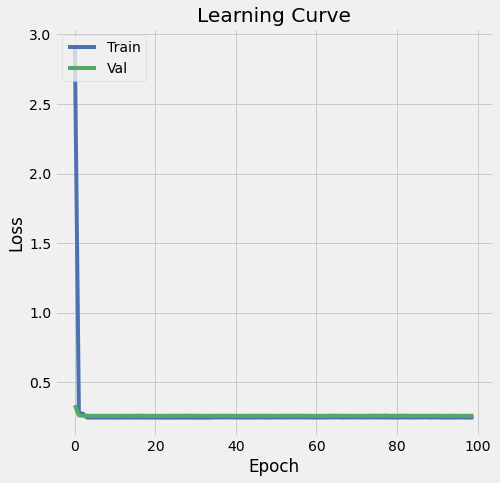

In [221]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Val'], loc='upper left')

plt.show()

### Interpretation of the results

--------------
ANN MODEL

---------------
the ANN model was overfitting the data. The overfitting was Unfortunately obtained by zeroing the dropout rate and running numerous epochs through the training dataset,with a sufficiently small learning rate.

After using a larger learning rate, it was noticed that the training and validation losses were both contiuning to decrease. As a result, I obtained the above learning curve showing a good fit.


The plot of learning curves shows a good fit since:

-The plot of training loss decreases to a point of stability.
-The plot of validation loss decreases to a point of stability and has a very small gap with the training loss.

Continued training of a good fit model will likely lead to an overfit. Therefore, the current ANN model with a 94.2% accuracy rate is otptimized.

---------------------------------------------
ANN MODEL VS LOGISTIC REGRESSION

---------------------------------------------
When comparing the ANN model with the logsitic regression model, The ANN model is chosen for its higher accuracy of 94.2% vs 89% for the logisitc regression.

However, in case that we do not to use a model that is computionally-intnesive, as in the case of ANN, the logsisitc regression model is preffered since its accuracy is very good and closer to the ANN model. 



### REFERENCES



[1] https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/

[2] https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/